### Problem Statement
- ### The goal here is to find the chance of admission of a candidate based on his/her GRE score, TOEFL score, rating of the university in which he/she is trying to get admission,strength of the SOP,Strength of the letter of the recommendation, CGPA and the research experience


# Data Preprocessing 

In [30]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
%matplotlib inline

In [31]:
df=pd.read_csv("Admission_Prediction.csv")  # importing the data set

In [32]:
df.drop('Serial No.', axis=1, inplace=True)
df.drop('SOP', axis=1, inplace=True)
df.drop('LOR', axis=1, inplace=True)


In [33]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [34]:
df_university = df.groupby(by='University Rating').mean()
df_university

,GRE Score,TOEFL Score,CGPA,Research,Chance of Admit
University Rating,,,,,
4.3,319.076923,109.000000,8.537692,0.692308,0.230769
7.0,323.250000,114.000000,8.667500,0.750000,0.500000
13.0,330.000000,111.000000,9.000000,1.000000,1.000000
15.0,317.000000,110.000000,8.880000,0.000000,0.000000
16.0,317.000000,110.000000,8.880000,0.000000,0.000000
17.5,317.833333,104.833333,8.973333,0.666667,0.500000
20.0,323.500000,110.500000,8.940000,0.000000,1.000000
29.9,314.692308,95.538462,8.346154,0.461538,0.461538
36.6,316.000000,107.833333,7.683333,0.333333,0.500000


In [35]:
x=df.drop(['Chance of Admit'],axis=1)
y=df['Chance of Admit']
# here we are droping the Chance of Admit and serial no, as they are not going to be used for the features 
# Chance of Admit is the target column which shows the probalility of admission for a candidate.

In [36]:
x.head() # checking the transformed feature column

,GRE Score,TOEFL Score,University Rating,CGPA,Research
0,317,110,4.3,8.88,0
1,332,110,4.3,8.74,1
2,333,113,4.3,9.45,1
3,338,118,4.3,9.09,1
4,300,90,4.3,8.20,1


In [37]:
x = np.array(x)
y = np.array(y)
y = y.reshape(-1,1)
y.shape

(142, 1)

In [38]:
# to be only used if you want to scale the data,standize the data,if the variation is huge in the dataset
# when we have huge variation in the data set
# i am not changing the data , i am changing the scale only like taking logs, sqrt--not changing the actual meaning of the data set
# variance betweeen the dataset become very low
# machine will understand in better way this data  as having low variance in the data set

from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
scaler_lablel=StandardScaler()
scaled_data=scaler_feature.fit_transform(x)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
scaled_data

array([[ 3.21499003e-01,  5.92944357e-01, -1.78623133e+00,
         1.01620604e+00, -1.01418511e+00],
       [ 6.07186478e-01,  5.92944357e-01, -1.78623133e+00,
         8.69590348e-01,  9.86013297e-01],
       [ 6.26232310e-01,  7.92308442e-01, -1.78623133e+00,
         1.61314135e+00,  9.86013297e-01],
       [ 7.21461468e-01,  1.12458192e+00, -1.78623133e+00,
         1.23612958e+00,  9.86013297e-01],
       [-2.28013477e-03, -7.36149545e-01, -1.78623133e+00,
         3.04072683e-01,  9.86013297e-01],
       [-2.28013477e-03, -7.16025940e-02, -1.78623133e+00,
        -5.96566562e-01,  9.86013297e-01],
       [-4.03717981e-02, -7.16025940e-02, -1.78623133e+00,
        -5.96566562e-01, -1.01418511e+00],
       [ 3.78636498e-01,  5.92944357e-01, -1.78623133e+00,
         6.18249164e-01,  9.86013297e-01],
       [ 3.97682330e-01,  9.91672528e-01, -1.78623133e+00,
         7.96282503e-01, -1.01418511e+00],
       [ 2.26269845e-01,  1.12458192e+00, -1.78623133e+00,
         9.46216960e-02

In [39]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=100)
# finding mi c1 , m2 c2,..... 

In [40]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [41]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

-0.5721252162349213

                   coefficient
GRE Score             0.005972
TOEFL Score           0.010743
University Rating     0.020667
CGPA                  0.521159
Research              0.711443
Feature: 0, Score: 0.00597
Feature: 1, Score: 0.01074
Feature: 2, Score: 0.02067
Feature: 3, Score: 0.52116
Feature: 4, Score: 0.71144


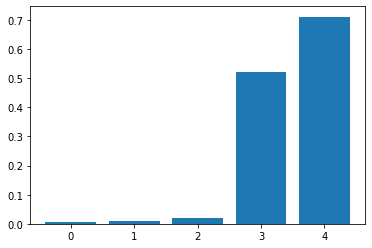

In [42]:
intercept = reg.intercept_
dfx = df.drop('Chance of Admit' , axis=1)
importance = reg.coef_[0]
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [43]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.01,random_state=100)
# finding mi c1 , m2 c2,..... 

In [44]:
# fitting the data to the linear regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [45]:
# calc the accuracy of the model
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)
score

-0.7888646858055886

# ANN Model

In [46]:
import tensorflow as tf
from tensorflow import keras
#tf.keras.layers.Dense
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
#opt = keras.optimizers.Adam(learning_rate=0.01)


In [47]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 5))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mean_squared_error', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                300       
                                                                 
 activation_4 (Activation)   (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 150)               7650      
                                                                 
 activation_5 (Activation)   (None, 150)               0         
                                                                 
 dropout_2 (Dropout)         (None, 150)               0         
                                                                 
 dense_7 (Dense)             (None, 150)               22650     
                                                                 
 activation_6 (Activation)   (None, 150)              

In [48]:
ANN_model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
epochs_hist = ANN_model.fit(train_x, train_y, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
6/6 [==============================] - 1s 28ms/step - loss: 1355.8209 - val_loss: 6.1519
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 922.3366 - val_loss: 16.6332
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 575.3069 - val_loss: 11.7152
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 298.9996 - val_loss: 1.6015
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 174.2974 - val_loss: 1.6504
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 107.6642 - val_loss: 1.5138
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 88.4880 - val_loss: 2.7899
Epoch 8/100
6/6 [==============================] - 0s 7ms/step - loss: 45.9630 - val_loss: 6.3357
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 38.3168 - val_loss: 1.6999
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 23.6462 - val_loss: 1.2973
Epoch 11/

In [50]:
result = ANN_model.evaluate(test_x, test_y)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

1/1 [==============================] - 0s 34ms/step - loss: 1.0452
Accuracy : -0.045213937759399414


In [51]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

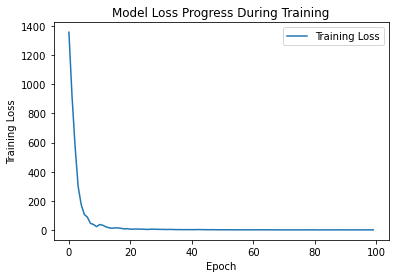

In [52]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# Decesion Tree Model

In [53]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.


from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(train_x, train_y)

DecisionTreeRegressor()

                   coefficient
GRE Score             0.351924
TOEFL Score           0.092115
University Rating     0.269976
CGPA                  0.246157
Research              0.039828
Feature: 0, Score: 0.35192
Feature: 1, Score: 0.09211
Feature: 2, Score: 0.26998
Feature: 3, Score: 0.24616
Feature: 4, Score: 0.03983


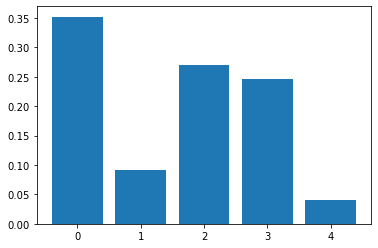

In [54]:
#feature Importancce testing
dfx = df.drop('Chance of Admit' , axis=1)
importance = decisionTree_model.feature_importances_
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [55]:
accuracy_decisionTree = decisionTree_model.score(test_x, test_y)
accuracy_decisionTree

0.0

# Random Forrest Model

In [56]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
randomForest_model.fit(train_x, train_y)
accuracy_randomforest = randomForest_model.score(test_x, test_y)
accuracy_randomforest

C:\Users\mrhus\AppData\Local\Temp/ipykernel_1384/2085754441.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_model.fit(train_x, train_y)


0.0

                   coefficient
GRE Score             0.335993
TOEFL Score           0.106569
University Rating     0.255471
CGPA                  0.253954
Research              0.048013
Feature: 0, Score: 0.33599
Feature: 1, Score: 0.10657
Feature: 2, Score: 0.25547
Feature: 3, Score: 0.25395
Feature: 4, Score: 0.04801


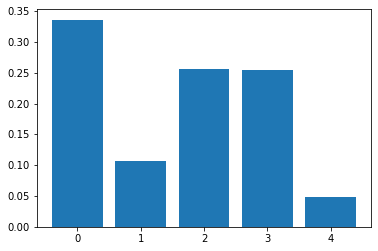

In [57]:
#feature Importancce testing
dfx = df.drop('Chance of Admit' , axis=1)
importance = randomForest_model.feature_importances_
features = pd.DataFrame(importance, dfx.columns, columns=['coefficient'])
print(features)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Saving the model to the local file system

In [58]:
#filename='finalized_model.pickle'
#pickle.dump(reg,open(filename,'wb'))
dump(randomForest_model, 'filename.joblib')

['filename.joblib']